<a href="https://colab.research.google.com/github/amalsalilan/IPL_Infographics_Data_Analytics_-_Data_Visualization_Infosys_Internship_Oct2024/blob/K_Akshya/9_Time_Series_Forcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")


In [37]:
df = pd.read_csv("/content/all_season_details_data.csv", low_memory=False)

In [38]:
Suryakumar_Yadav_data = df[df['batsman1_name'] == 'Suryakumar Yadav']

In [39]:
Suryakumar_Yadav_season_runs = Suryakumar_Yadav_data.groupby('season')['runs'].sum()

In [40]:
if isinstance(Suryakumar_Yadav_season_runs, pd.Series):
    Suryakumar_Yadav_season_runs = Suryakumar_Yadav_season_runs.reset_index()

In [41]:
Suryakumar_Yadav_season_runs['season'] = pd.to_datetime(Suryakumar_Yadav_season_runs['season'], format='%Y')
print(Suryakumar_Yadav_season_runs)

       season  runs
0  2012-01-01     0
1  2014-01-01   170
2  2015-01-01   161
3  2016-01-01   190
4  2017-01-01   108
5  2018-01-01   524
6  2019-01-01   437
7  2020-01-01   492
8  2021-01-01   327
9  2022-01-01   313
10 2023-01-01   618


**Visualization**

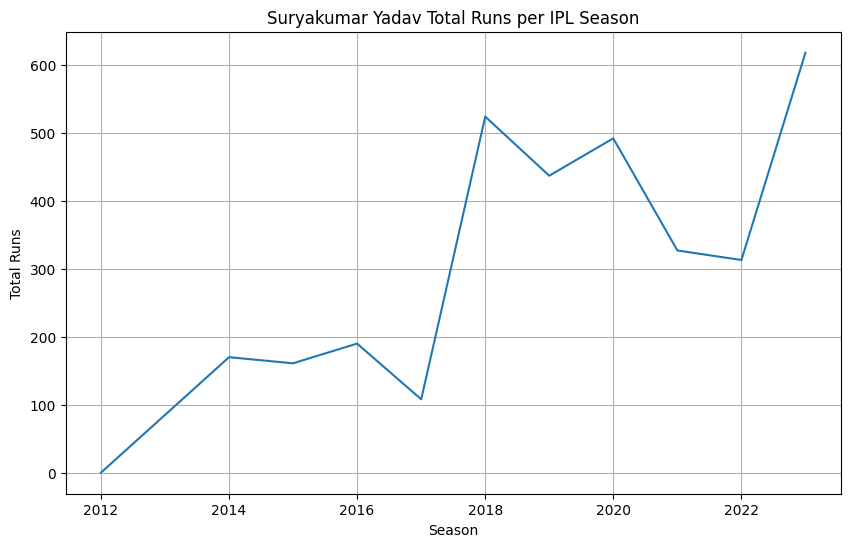

In [42]:
# Assuming 'Suryakumar Yadav_season_runs' DataFrame has 'season' and 'runs' columns
plt.figure(figsize=(10, 6))
plt.plot(Suryakumar_Yadav_season_runs['season'], Suryakumar_Yadav_season_runs['runs'])
plt.xlabel('Season')
plt.ylabel('Total Runs')
plt.title('Suryakumar Yadav Total Runs per IPL Season')
plt.grid(True)
plt.show()

**Histogram and Density Plot**

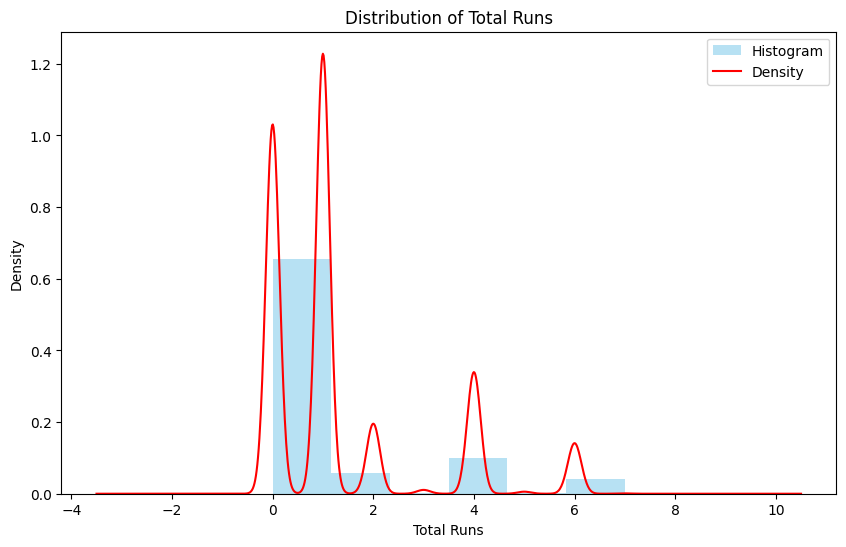

In [43]:
plt.figure(figsize=(10, 6))
df['runs'].plot(kind='hist', bins=6, density=True, alpha=0.6, color='skyblue', label='Histogram')
df['runs'].plot(kind='kde', color='red', label='Density')
plt.title('Distribution of Total Runs')
plt.xlabel('Total Runs')
plt.legend()
plt.show()

**Outlier Detection**

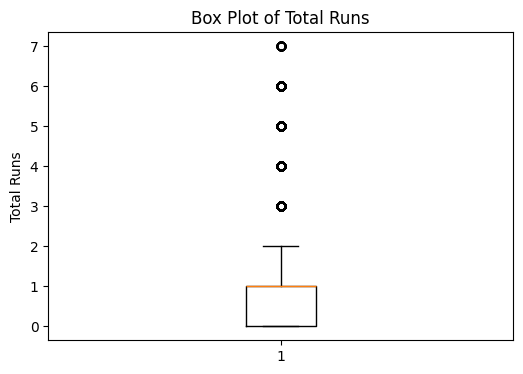

In [44]:
plt.figure(figsize=(6, 4))
plt.boxplot(df['runs'])
plt.title('Box Plot of Total Runs')
plt.ylabel('Total Runs')
plt.show()

**Stationarity Check**

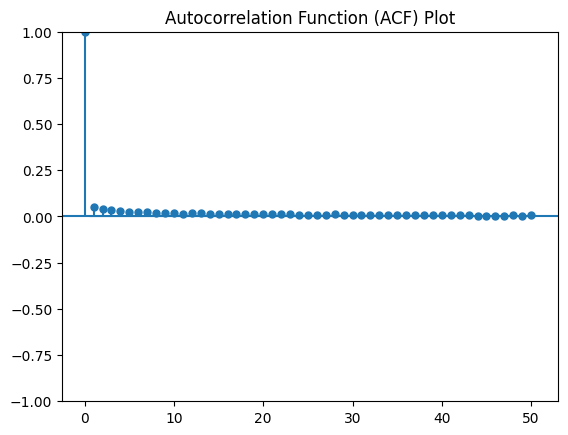

In [45]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df['runs'].dropna(), lags=50)
plt.title('Autocorrelation Function (ACF) Plot')
plt.show()

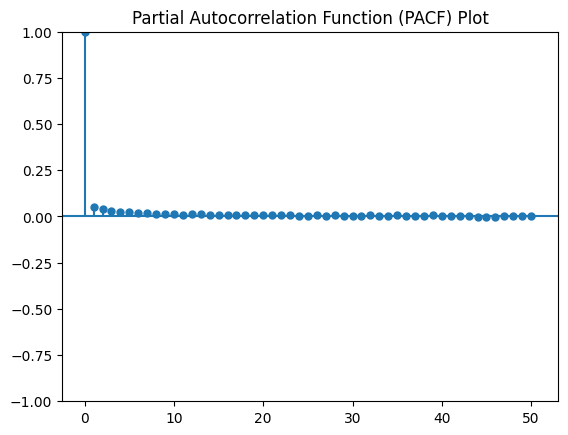

In [46]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df['runs'].dropna(), lags=50)
plt.title('Partial Autocorrelation Function (PACF) Plot')
plt.show()

**Augmented Dickey-Fuller (ADF) Test**

In [47]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df['runs'].dropna())
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -64.685367
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


 **Making the Data Stationary**


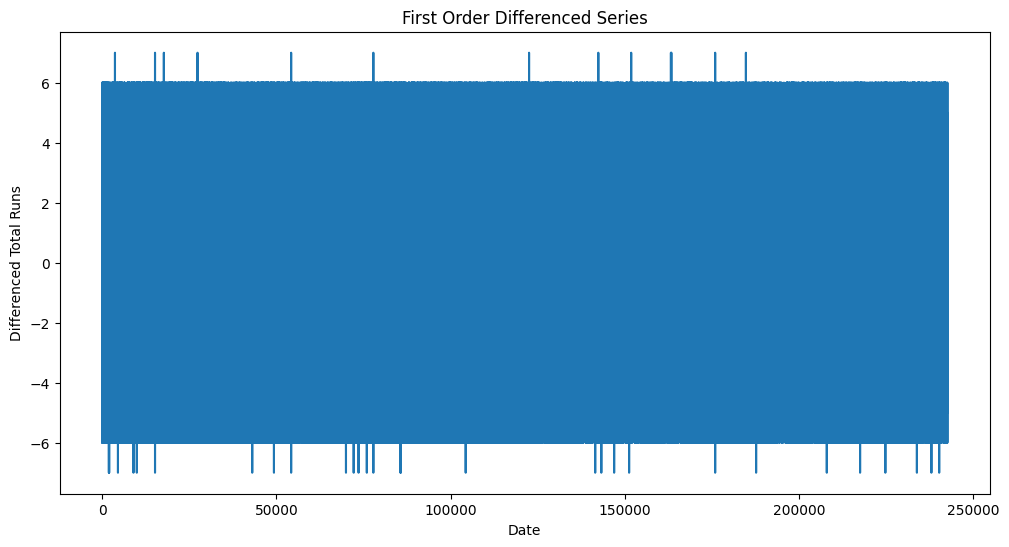

In [48]:
df['Diff_1'] = df['runs'] - df['runs'].shift(1)

plt.figure(figsize=(12, 6))
plt.plot(df['Diff_1'])
plt.title('First Order Differenced Series')
plt.xlabel('Date')
plt.ylabel('Differenced Total Runs')
plt.show()

In [49]:
adf_result_diff = adfuller(df['Diff_1'].dropna())
print('ADF Statistic: %f' % adf_result_diff[0])
print('p-value: %f' % adf_result_diff[1])
print('Critical Values:')
for key, value in adf_result_diff[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -89.229717
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


**Log Transformation**

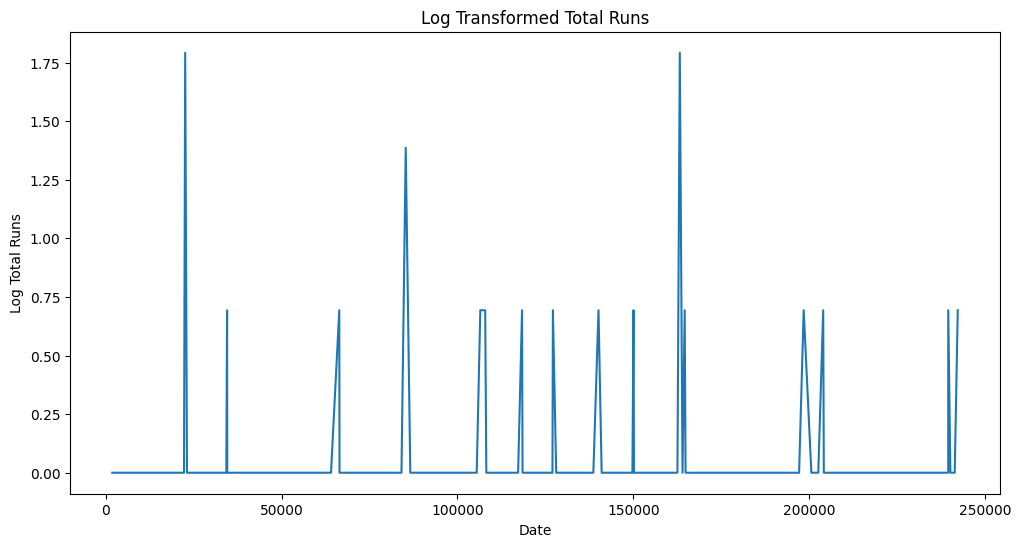

In [50]:
df['Log_Total_Runs'] = np.log(df['runs']).replace([np.inf, -np.inf], np.nan)
df['Log_Diff_1'] = df['Log_Total_Runs'] - df['Log_Total_Runs'].shift(1)
df['Log_Diff_1'].dropna(inplace=True)
df.dropna(inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(df['Log_Total_Runs'])
plt.title('Log Transformed Total Runs')
plt.xlabel('Date')
plt.ylabel('Log Total Runs')
plt.show()

In [51]:
adf_result_log_diff = adfuller(df['Log_Diff_1'])
print('ADF Statistic: %f' % adf_result_log_diff[0])
print('p-value: %f' % adf_result_log_diff[1])
print('Critical Values:')
for key, value in adf_result_log_diff[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -15.615309
p-value: 0.000000
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


**Re-Checking ACF and PACF Plots**

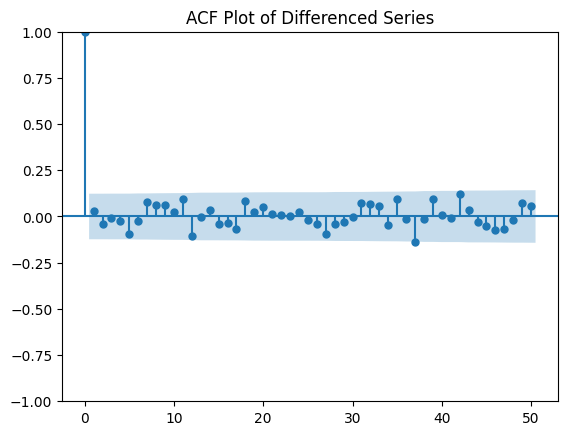

In [52]:
plot_acf(df['Diff_1'].dropna(), lags=50)
plt.title('ACF Plot of Differenced Series')
plt.show()

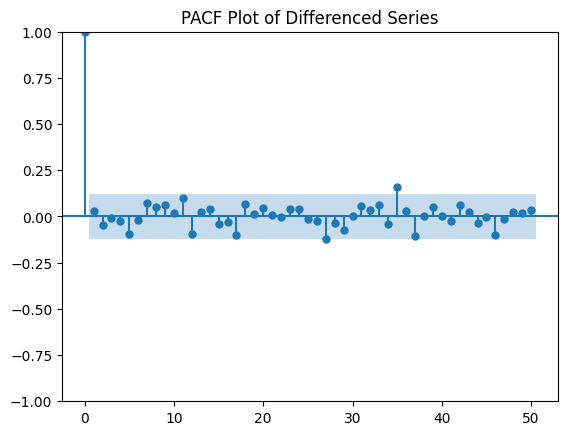

In [53]:
plot_pacf(df['Diff_1'].dropna(), lags=50)
plt.title('PACF Plot of Differenced Series')
plt.show()

**Forecast using SARIMAX**

In [54]:
Suryakumar_Yadav_season_runs.set_index('season', inplace=True)

In [55]:
# Get the number of seasons
num_seasons = len(Suryakumar_Yadav_season_runs)
num_seasons

11

In [56]:
# Fit the SARIMA model
model = SARIMAX(Suryakumar_Yadav_season_runs,
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 4))

In [57]:
#start_params = [0, 0, 0, 0, 0, 0, 1]
result = model.fit()
result

In [58]:
forecast = result.get_forecast(steps=5)
forecast_runs = forecast.predicted_mean.astype(int)
print(f"Predicted runs for next season: {forecast_runs}")

Predicted runs for next season: 11    575
12    468
13    724
14    725
15    755
Name: predicted_mean, dtype: int64


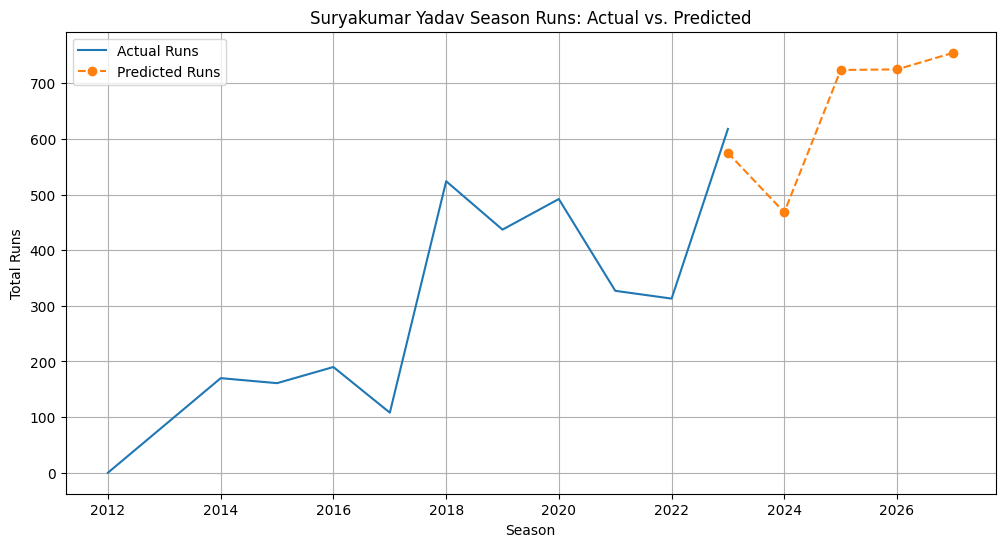

In [60]:
forecast_df = pd.DataFrame({'season': pd.date_range(start='2023-01-01', periods=5, freq='YS'), 'predicted_runs': forecast_runs.values})

# Merge the forecast with the original data
merged_data = pd.concat([Suryakumar_Yadav_season_runs.reset_index(), forecast_df], ignore_index = True)
merged_data['season'] = pd.to_datetime(merged_data['season'])

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(Suryakumar_Yadav_season_runs.index,Suryakumar_Yadav_season_runs['runs'], label='Actual Runs')
plt.plot(forecast_df['season'], forecast_df['predicted_runs'], label='Predicted Runs', linestyle='--', marker='o')
plt.title('Suryakumar Yadav Season Runs: Actual vs. Predicted')
plt.xlabel('Season')
plt.ylabel('Total Runs')
plt.legend()
plt.grid(True)
plt.show()